#### NOTE #### THE FACE CASCADE FILE NEEDS TO BE DOWNLOADED FROM https://github.com/opencv/opencv/tree/master/data/haarcascades

In [0]:
## Install things
#### NOTE #### THE FACE CASCADE FILE NEEDS TO BE DOWNLOADED FROM https://github.com/opencv/opencv/tree/master/data/haarcascades
pip install opencv-python


In [0]:
## Take Care of Imports
import numpy as np
import cv2
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os 

In [0]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## Upload the original human image set

#Get the pictures
picturepath = '/content/drive/My Drive/MIE463/lfw_funneled'
image_set = torchvision.datasets.ImageFolder(root=picturepath,transform=torchvision.transforms.ToTensor())


#Initiate the loader
image_loader = torch.utils.data.DataLoader(
        image_set,
        batch_size=500,
        num_workers=0,
        shuffle=True
    )


In [0]:
## Create the zoomed in and cleaned face data
##Zoom in on face of the original train photos and upload new photos back into google drive
#Download the facial recognition
import os 

#Get the information needed
#### NOTE #### THE FACE CASCADE FILE NEEDS TO BE DOWNLOADED FROM https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/MIE463/data/haarcascades/haarcascade_frontalface_default.xml')
directory = '/content/drive/My Drive/HumanImage/OriginalPhotos'

#Change to current directory
os.chdir(directory) 
batch = 0 
#Loop through all the batches of images
for images, labels in iter(image_loader):
  batch = batch + 1
  print(batch)

  #Convert images to Numpy
  images = images.numpy()

  #loop through each image in the image set to perform transformation
  for i,image in enumerate(images):
    
    #Get the clean cv2 image
    cleanimage = cv2.cvtColor(np.transpose(image,(1,2,0)), cv2.COLOR_RGB2BGR)*255
    cleanimage = (cleanimage).astype(np.uint8)
    
    #Get the greyscale
    gray_image = cv2.cvtColor(np.transpose(image,(1,2,0)), cv2.COLOR_RGB2GRAY)
    
    #Convert to type uint8 to get it to work
    gray_image = (gray_image * 255).round().astype(np.uint8)
    
    #Get the location of the faces
    faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)

    #Get the list for all images that are clean
    cleanimgs = []

    #Loop to get the facial images
    for (x,y,w,h) in faces:
      #Post the square on the picture
      img = cv2.rectangle(gray_image,(x,y),(x+w,y+h),(255,0,0),2)

      #Get the colour photo, clean and resize
      croppedimg = cleanimage[max(0,y-25):min(249,y+h+25), max(0,x-25):min(249,x+w+25)]
      croppedimg = cv2.resize(croppedimg, (250,250))
      cleanimg = cv2.fastNlMeansDenoisingColored(croppedimg,None,2,2,7,21)
      cleanimgs.append(cleanimg)
    
    #Print the face location
    #cv2_imshow(img)
    #For each faceimage, upload in a file
    for j,faceimage in enumerate(cleanimgs):
      #Only get first face
      if j > 0:
        continue
      #cv2_imshow(faceimage)

      #Get the file name and write to the path
      filename = 'original' + str(batch) + '_' + str(i) + '_' + str(j) + '.jpg'
      cv2.imwrite(filename, faceimage)
    
    #print(faces)
  print('batch done')

1
batch done
2
batch done
3
batch done
4
batch done
5
batch done
6
batch done
7
batch done
8
batch done
9
batch done
10
batch done
11
batch done
12
batch done
13
batch done
14
batch done
15
batch done
16
batch done
17
batch done
18
batch done
19
batch done
20
batch done
21
batch done
22
batch done
23
batch done
24
batch done
25
batch done
26
batch done
27
batch done


In [0]:
###FUNCTION FOR GETTING FACES FROM AN INDIVIDUAL IMAGE FILE
#Get the image
image = cv2.imread('/content/lefas.jpg')
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/APS360 Project/data/haarcascades/haarcascade_frontalface_default.xml')

#Get directory
directory = '/content/drive/My Drive/APS360 Project/TestPhotos'
os.chdir(directory) 

#Get the greyscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Convert to type uint8 to get it to work
gray_image = (gray_image).round().astype(np.uint8)

#Get the location of the faces
faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)

#For the location of the face, plot the square
cleanimgs = []

#For each face, get the cropped photo and clean it
for (x,y,w,h) in faces:
  #Post the square on the picture
  img = cv2.rectangle(gray_image,(x,y),(x+w,y+h),(255,0,0),2)

  #Get the colour photo, clean and resize
  croppedimg = image[y-int(round(h*.3,0)):y+int(round(h*1.3,0)), x-int(round(w*.3,0)):x+int(round(w*1.3,0))]
  croppedimg = cv2.resize(croppedimg, (250,250))
  cleanimg = cv2.fastNlMeansDenoisingColored(croppedimg,None,2,2,7,21)
  cleanimgs.append(cleanimg)

#Print the face location
cv2_imshow(img)
pytorchready = []
for i,faceimage in enumerate(cleanimgs):
  cv2_imshow(faceimage)
  pytorchready.append(cv2.cvtColor(faceimage, cv2.COLOR_BGR2RGB))

  #Get the file name and write to the path
  filename = 'testphoto4_' + str(i) + '.jpg'
  cv2.imwrite(filename, faceimage)

#Resize the pixel scale to 0-1
for i in range(len(pytorchready)):
  pytorchready[i] = pytorchready[i]/255
print(pytorchready[0])

#Print the face location for pytorch ready stuff
for plotimage in pytorchready:
  plt.figure(figsize=(10,10))
  plt.imshow(plotimage)
print(faces)

Output hidden; open in https://colab.research.google.com to view.

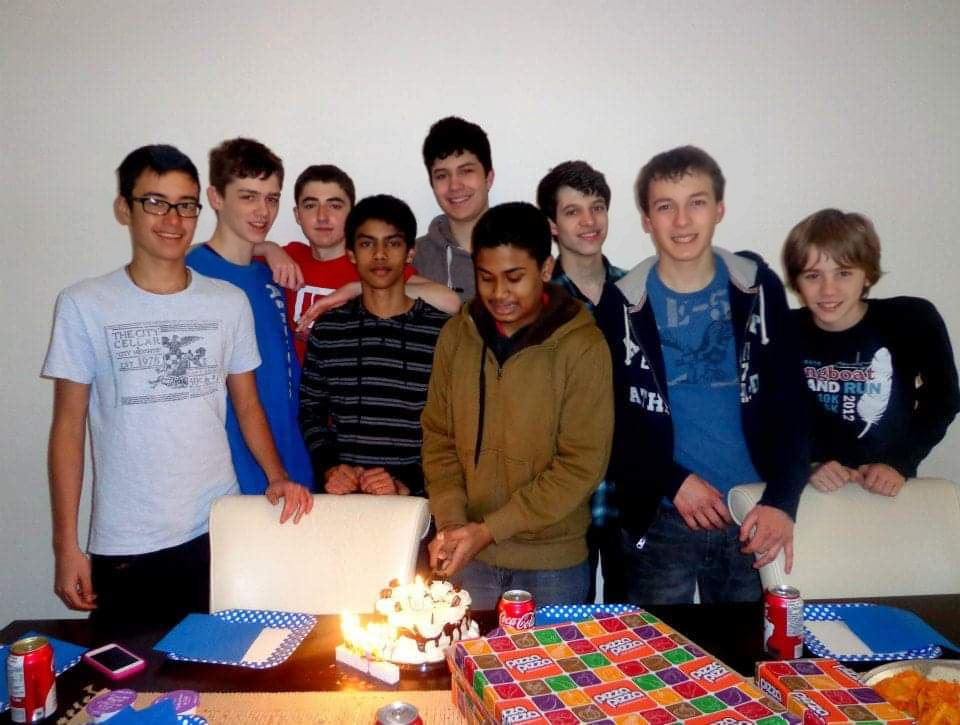

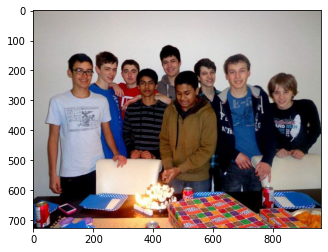

In [0]:
#FUNCTION FOR INSERTING THE EXTRACTED FACE PHOTOS BACK INTO THE ORIGINAL IMAGE (when after being changed)
i = 0
for row, col, meh, neh in faces:
  #Go through the row and column indexes
  toprow = row - int(round(meh*.3,0))
  botrow = row + int(round(meh*1.3,0))
  topcol = col - int(round(neh*0.3,0))
  botcol = col + int(round(neh*1.3,0))

  #Resize the image in question
  usethis = cv2.resize(cleanimgs[i], (botcol-topcol,botrow-toprow))

  #Go through the rows and columns and replace the variables
  for first, p in enumerate(range(topcol,botcol)):
    for second, s in enumerate(range(toprow, botrow)):
      imageedit[p][s][0] = usethis[first][second][0]
      imageedit[p][s][1] = usethis[first][second][1]
      imageedit[p][s][2] = usethis[first][second][2]
  # Recharge i
  i = i +1
cv2_imshow(imageedit)
img2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255
plt.imshow(img2)

  